In [66]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [67]:
data=pd.read_csv('../Datasets/delhipm2.5.csv')
print(data.tail())
data.describe()

       Year  F_Month  F_Day  UTC Hour  PM2.5  Month  Day    acq_date
28800  2019       11      8        12   98.8     11    8  08-11-2019
28801  2019       11      8        13   90.2     11    8  08-11-2019
28802  2019       11      8        14  108.6     11    8  08-11-2019
28803  2019       11      8        15  109.0     11    8  08-11-2019
28804  2019       11      8        16  144.7     11    8  08-11-2019


,Year,F_Month,F_Day,UTC Hour,PM2.5,Month,Day
count,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000
mean,2017.447908,6.631002,15.581219,11.491685,106.533446,6.631002,15.581219
std,1.062240,3.262733,8.744167,6.923078,86.011085,3.262733,8.744167
min,2016.000000,1.000000,1.000000,0.000000,4.600000,1.000000,1.000000
25%,2017.000000,4.000000,8.000000,5.000000,49.700000,4.000000,8.000000
50%,2017.000000,7.000000,16.000000,11.000000,79.300000,7.000000,16.000000
75%,2018.000000,9.000000,23.000000,18.000000,136.600000,9.000000,23.000000
max,2019.000000,12.000000,31.000000,23.000000,987.900000,12.000000,31.000000


In [68]:
#data=pd.DataFrame()
data=data[['Year','Month','Day','UTC Hour','acq_date','PM2.5']]
data.head()
data.tail()

,Year,Month,Day,UTC Hour,acq_date,PM2.5
28800,2019,11,8,12,08-11-2019,98.8
28801,2019,11,8,13,08-11-2019,90.2
28802,2019,11,8,14,08-11-2019,108.6
28803,2019,11,8,15,08-11-2019,109.0
28804,2019,11,8,16,08-11-2019,144.7


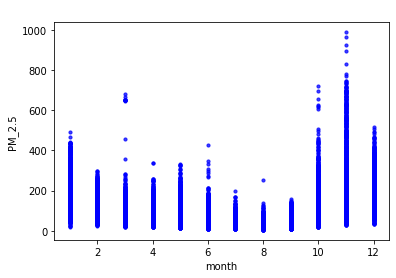

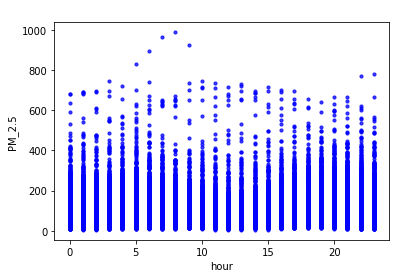

In [69]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Month=data['Month']
Pm25=data['PM2.5']
Hour=data['UTC Hour']    
scatterplot(Month,Pm25,'month','PM_2.5')
scatterplot(Hour,Pm25,'hour','PM_2.5')

In [70]:
month_count=data.groupby('Month').count()
month_count

,Year,Day,UTC Hour,acq_date,PM2.5
Month,,,,,
1,1940,1940,1940,1940,1940
2,1738,1738,1738,1738,1738
3,2618,2618,2618,2618,2618
4,2112,2112,2112,2112,2112
5,2880,2880,2880,2880,2880
6,2551,2551,2551,2551,2551
7,2741,2741,2741,2741,2741
8,2672,2672,2672,2672,2672
9,2635,2635,2635,2635,2635


In [71]:
Aggregation={'PM2.5':'mean'}
data_daywise=pd.DataFrame()
data_daywise=data.groupby(['Year','Month','Day', 'acq_date']).agg(Aggregation).reset_index()
data_daywise.tail()


,Year,Month,Day,acq_date,PM2.5
1262,2019,11,4,04-11-2019,297.742857
1263,2019,11,5,05-11-2019,150.991304
1264,2019,11,6,06-11-2019,110.786957
1265,2019,11,7,07-11-2019,191.000000
1266,2019,11,8,08-11-2019,127.460000


In [72]:
fire_data = pd.read_pickle("fire_data.pkl")

In [73]:
fire_data.head() 

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day,Month,Year,acq_date
0,31.258585,73.542217,310.346341,1.114634,821.512195,59.609756,293.568293,10.341463,1.0,1.0,2016.0,01-01-2016
1,31.108153,72.678637,306.000000,1.313333,710.366667,58.300000,287.846667,13.253333,2.0,1.0,2016.0,02-01-2016
2,31.202693,75.962917,308.843103,1.222414,807.017241,58.500000,291.356897,12.436207,3.0,1.0,2016.0,03-01-2016
3,30.361394,72.666141,307.347059,1.476471,610.411765,56.764706,288.376471,13.805882,4.0,1.0,2016.0,04-01-2016
4,30.755435,76.612978,307.998039,1.219608,795.039216,60.450980,293.150980,9.107843,5.0,1.0,2016.0,05-01-2016


In [74]:
type(fire_data['acq_date'][0])

str

In [75]:
type(data['acq_date'][0])

str

In [76]:
type(data_daywise['acq_date'][0])

str

In [77]:
combined_data = pd.merge(data_daywise, fire_data, on="acq_date", how="inner")

In [78]:
combined_data.describe()

,Year_x,Month_x,Day_x,PM2.5,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day_y,Month_y,Year_y
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,2017.446809,6.594894,15.591489,110.928683,31.118984,74.197274,318.500373,1.400772,786.700063,58.657035,299.203871,16.097658,15.591489,6.594894,2017.446809
std,1.065338,3.345923,8.758345,77.942180,0.906242,1.572277,8.097547,0.382828,196.288144,10.237307,6.452440,8.788229,8.758345,3.345923,1.065338
min,2016.000000,1.000000,1.000000,14.520833,29.418700,70.802000,301.200000,1.000000,459.000000,0.000000,272.200000,4.300000,1.000000,1.000000,2016.000000
25%,2017.000000,4.000000,8.000000,57.827283,30.532140,73.069380,312.998634,1.132883,665.500828,54.703297,294.460000,10.512429,8.000000,4.000000,2017.000000
50%,2017.000000,6.000000,15.000000,88.775000,30.968193,74.266282,318.361911,1.311765,789.500000,60.000000,299.609674,14.224615,15.000000,6.000000,2017.000000
75%,2018.000000,10.000000,23.000000,139.772024,31.530132,75.164007,323.944667,1.577206,830.155523,64.447619,303.401587,19.776322,23.000000,10.000000,2018.000000
max,2019.000000,12.000000,31.000000,669.080952,35.611800,79.721200,351.200000,4.800000,2123.000000,94.000000,318.617391,119.760000,31.000000,12.000000,2019.000000


In [79]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1174
Data columns (total 16 columns):
Year_x        1175 non-null int64
Month_x       1175 non-null int64
Day_x         1175 non-null int64
acq_date      1175 non-null object
PM2.5         1175 non-null float64
latitude      1175 non-null float64
longitude     1175 non-null float64
brightness    1175 non-null float64
scan          1175 non-null float64
acq_time      1175 non-null float64
confidence    1175 non-null float64
bright_t31    1175 non-null float64
frp           1175 non-null float64
Day_y         1175 non-null float64
Month_y       1175 non-null float64
Year_y        1175 non-null float64
dtypes: float64(12), int64(3), object(1)
memory usage: 156.1+ KB


In [80]:
combined_data.head()

,Year_x,Month_x,Day_x,acq_date,PM2.5,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day_y,Month_y,Year_y
0,2016,3,3,03-03-2016,135.720000,30.841667,74.494152,314.580952,1.678571,730.857143,59.642857,295.947619,17.854762,3.0,3.0,2016.0
1,2016,3,4,04-03-2016,62.595833,30.936911,75.757876,314.871053,1.331579,744.631579,52.921053,299.073684,12.702632,4.0,3.0,2016.0
2,2016,3,5,05-03-2016,54.475000,30.322457,73.532757,312.514286,1.042857,785.571429,47.857143,294.257143,7.814286,5.0,3.0,2016.0
3,2016,3,6,06-03-2016,84.350000,30.812557,73.519957,308.542857,2.271429,658.285714,50.000000,291.942857,16.700000,6.0,3.0,2016.0
4,2016,3,7,07-03-2016,92.941667,30.924043,73.301533,313.038095,1.304762,786.571429,55.952381,298.114286,9.942857,7.0,3.0,2016.0


In [81]:
columns = list(['Year_x','Month_x','Day_x','PM2.5','latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])
combined_data=combined_data[columns]

In [84]:
combined_data = combined_data.reindex(np.random.permutation(combined_data.index))   
combined_data.head()

,Year_x,Month_x,Day_x,PM2.5,latitude,longitude,brightness,scan,confidence,bright_t31,frp
677,2018,3,12,75.086364,30.805381,73.268719,317.594667,1.164000,62.000000,298.480000,13.988000
517,2017,9,28,99.666667,32.001050,73.794075,318.625000,1.150000,69.000000,300.850000,12.325000
720,2018,4,29,94.200000,30.330458,73.894080,328.943590,1.267521,65.290598,309.867521,15.260684
992,2019,3,12,52.220833,31.527400,71.659075,313.450000,1.375000,60.500000,295.800000,13.066667
605,2017,12,30,274.800000,31.362684,73.772267,308.200000,1.181034,56.155172,293.693103,8.987931


In [19]:
features = list(['Year_x', 'Month_x', 'Day_x', 'latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])


In [20]:
X = combined_data[features]


In [24]:
X.head()

,Year_x,Month_x,Day_x,latitude,longitude,brightness,scan,confidence,bright_t31,frp
582,2017,12,4,32.591017,72.528225,308.391667,1.358333,64.916667,286.075000,14.908333
875,2018,10,30,30.535074,75.042806,319.366224,1.109070,60.769351,300.478186,12.476857
1101,2019,8,6,30.551460,73.131930,321.970000,1.070000,41.500000,301.610000,9.360000
1059,2019,6,6,31.959959,74.521941,329.418750,1.856250,71.125000,308.631250,30.412500
990,2019,3,10,30.778739,76.951106,307.777778,1.083333,51.888889,294.772222,6.494444


In [21]:
X.describe()

,Year_x,Month_x,Day_x,latitude,longitude,brightness,scan,confidence,bright_t31,frp
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,2017.446809,6.594894,15.591489,31.118984,74.197274,318.500373,1.400772,58.657035,299.203871,16.097658
std,1.065338,3.345923,8.758345,0.906242,1.572277,8.097547,0.382828,10.237307,6.452440,8.788229
min,2016.000000,1.000000,1.000000,29.418700,70.802000,301.200000,1.000000,0.000000,272.200000,4.300000
25%,2017.000000,4.000000,8.000000,30.532140,73.069380,312.998634,1.132883,54.703297,294.460000,10.512429
50%,2017.000000,6.000000,15.000000,30.968193,74.266282,318.361911,1.311765,60.000000,299.609674,14.224615
75%,2018.000000,10.000000,23.000000,31.530132,75.164007,323.944667,1.577206,64.447619,303.401587,19.776322
max,2019.000000,12.000000,31.000000,35.611800,79.721200,351.200000,4.800000,94.000000,318.617391,119.760000


In [22]:
y = combined_data['PM2.5']

In [23]:
y=pd.DataFrame(y)
y.describe()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 582 to 64
Data columns (total 1 columns):
PM2.5    1175 non-null float64
dtypes: float64(1)
memory usage: 18.4 KB


In [25]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [26]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

In [27]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

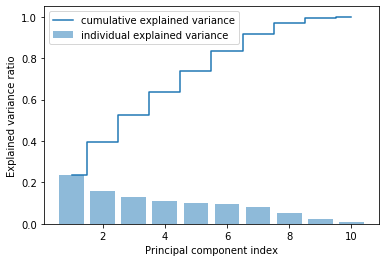

In [28]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.5,align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [29]:
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
print("after scaling minimum", X_scaled.min(axis=0)) 

after scaling minimum [-1.35865288 -1.6728643  -1.66671919 -1.87699041 -2.16038254 -2.13740522
 -1.04731643 -5.73217246 -4.18684534 -1.34301021]


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (1175, 4)


In [31]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3
0,-1.916466,1.104937,0.773376,-1.353793
1,0.111621,-0.857711,-1.086602,-0.100377
2,-0.847191,-1.129071,-0.155735,0.240605
3,2.723518,0.610223,1.396592,1.066705
4,-1.855417,-1.195000,-0.391130,2.064969


In [32]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

0    0.366199
1    0.251533
2    0.206239
3    0.176030
dtype: float64


c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


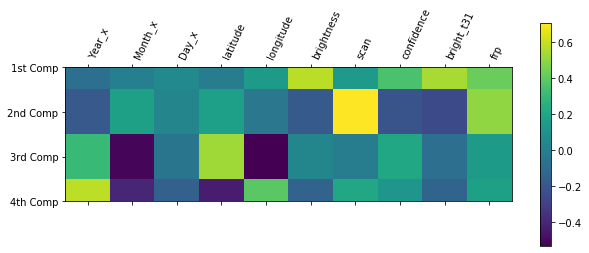

In [36]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2, 3],['1st Comp','2nd Comp','3rd Comp', '4th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(10),features,rotation=65, ha="left")
plt.tight_layout()
plt.show()

In [33]:
y_cat = pd.DataFrame()
y_cat=y
y_cat.head()

,PM2.5
582,253.200000
875,221.516667
1101,30.112500
1059,57.991667
990,84.523529


In [34]:
for i in range(len(y_cat['PM2.5'])):

    if y_cat['PM2.5'].iloc[i] < 150:
        y_cat['PM2.5'].iloc[i] = 0
    elif y_cat['PM2.5'].iloc[i] < 300:
        y_cat['PM2.5'].iloc[i] = 1
    else:
        y_cat['PM2.5'].iloc[i] = 2
        
y_cat

,PM2.5
582,1.0
875,1.0
1101,0.0
1059,0.0
990,0.0
...,...
291,1.0
154,0.0
164,0.0
642,0.0


In [35]:
y_cat.describe()

,PM2.5
count,1175.000000
mean,0.249362
std,0.493516
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [37]:
y_norm = sc.fit_transform(y)
y_norm = pd.DataFrame(y_norm)
y_norm.head()

,0
0,1.521649
1,1.521649
2,-0.505491
3,-0.505491
4,-0.505491


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_norm, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression()  
LIR=regressor.fit(X_train, y_train) 

In [41]:
y_predLIR = LIR.predict(X_test)

In [42]:
y_test = np.array(y_test)
y_predLIR = np.array(y_predLIR)

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predLIR.flatten()})
df

,Actual,Predicted
0,-0.505491,-0.454640
1,-0.505491,-0.240206
2,-0.505491,0.163355
3,-0.505491,-0.119824
4,-0.505491,-0.087506
...,...,...
230,-0.505491,0.090568
231,-0.505491,-0.314681
232,-0.505491,0.035449
233,-0.505491,-0.188551


In [44]:
LIR.coef_

array([[-0.16667696,  0.17848061, -0.19161916,  0.01112128]])

In [45]:
print("The fitting score of Linear Regression model is :" ,LIR.fit(X_train, y_train).score(X_train, y_train))


The fitting score of Logistic Regression model is : 0.15975963985507924


In [47]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto',C=2)
X_traincat, X_testcat, y_traincat, y_testcat = train_test_split(X_pca, y_cat, test_size=0.2, random_state=0)
SVM = SVM.fit(X_traincat, y_traincat) 

c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_predSVM=SVM.predict(X_testcat)

In [49]:
print("The fitting score of Logistic Regression model is :",SVM.fit(X_traincat, y_traincat).score(X_traincat, y_traincat))
print("The F1Score score after testing is :" , f1_score(y_testcat, y_predSVM, average='micro'))
print("The F1Score score after testing is :",f1_score(y_testcat, y_predSVM, average='weighted'))
print ("The accuracy score after testing is :" , metrics.accuracy_score(y_testcat,y_predSVM))

The fitting score of Logistic Regression model is : 0.8446808510638298
The F1Score score after testing is : 0.8468085106382979
The F1Score score after testing is : 0.8219961657118928
The accuracy score after testing is : 0.8468085106382979


c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
y_predSVM = np.array(y_predSVM)
y_testcat= np.array(y_predSVM)
df2 = pd.DataFrame({'Actual': y_testcat.flatten(), 'Predicted': y_predSVM.flatten()})
df2.describe()

,Actual,Predicted
count,235.000000,235.000000
mean,0.114894,0.114894
std,0.319574,0.319574
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [51]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression( solver='lbfgs',multi_class='multinomial').fit(X_traincat,y_traincat)


c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_predLR=LR.predict(X_testcat)

In [53]:
print("The fitting score of Logistic Regression model is :",LR.fit(X_traincat, y_traincat).score(X_traincat, y_traincat))
print("The F1Score score after testing is :", f1_score(y_testcat, y_predLR, average='micro'))
print("The F1Score score after testing is :",f1_score(y_testcat, y_predLR, average='weighted'))
print("The accuracy score after testing is :",metrics.accuracy_score(y_testcat,y_predLR))

The fitting score of Logistic Regression model is : 0.7882978723404256
The F1Score score after testing is : 0.8680851063829788
The F1Score score after testing is : 0.859353151249937
The accuracy score after testing is : 0.8680851063829788


c:\users\soumya agarwal\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
y_predLR = np.array(y_predLR)
y_testcat = np.array(y_testcat)
df2 = pd.DataFrame({'Actual': y_testcat.flatten(), 'Predicted': y_predLR.flatten()})
df2.describe()

,Actual,Predicted
count,235.000000,235.000000
mean,0.114894,0.085106
std,0.319574,0.279636
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [55]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0,min_samples_split=36,criterion='entropy')
DTC=DTC.fit(X_traincat,y_traincat)
y_predDTC=DTC.predict(X_testcat)

In [56]:
print("The fitting score of Logistic Regression model is :" , DTC.fit(X_traincat, y_traincat).score(X_traincat, y_traincat))
print("The F1Score score after testing is :", f1_score(y_testcat, y_predDTC, average='micro'))
print("The F1Score score after testing is :",f1_score(y_testcat, y_predDTC, average='weighted'))
print("The accuracy score after testing is :", metrics.accuracy_score(y_testcat,y_predDTC))

The fitting score of Logistic Regression model is : 0.851063829787234
The F1Score score after testing is : 0.9446808510638298
The F1Score score after testing is : 0.9480205820631352
The accuracy score after testing is : 0.9446808510638298


In [57]:
y_predDTC = np.array(y_predDTC)
df2 = pd.DataFrame({'Actual': y_testcat.flatten(), 'Predicted': y_predDTC.flatten()})
df2.describe()

,Actual,Predicted
count,235.000000,235.000000
mean,0.114894,0.153191
std,0.319574,0.360941
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000
